Результат скидывать на почту tt48@mail.ru в виде файла *.ipynb<br>
В теме письма указывать, что это второй курс и что это "системы аналитических вычислений" или "пакеты". + номер ДЗ туда же.<br>
В содержании письма указывать ФИО и группу.

<h1>Задание 0</h1>
<pre>
Установить SageMath 9.2 (https://www.sagemath.org/)
В случае проблем - писать на почту.
	
Как резервный вариант - on-line редакторы
	https://cocalc.com/doc/jupyter-notebook.html
		есть некоторые проблемы по LaTeX возможностям.
	https://sagecell.sagemath.org/
		работает, но предоставляется только одна ячейка
	
	- медленнее работают
		, есть ограничения по количеству времени на выполнение запроса
		, некоторые ошибки по синтаксису опускаются (LaTeX касается)
		, больше места экрана уходит на менюшки и прочего.
		
	+ ничего устанавливать не нужно. Можно даже не регистрироваться.
</pre>

<h1>Задание 1 - часть 1 - Квадратик</h1>
Доделать начинания, что были на занятии:<br>
при помощи функции отображения графиков отобразить квадратик.<br>
Задав квадратик матрицей координат, повернуть и сдвинуть его относительно исходного положения.<br>
Вывести исходный квадратик и результат.


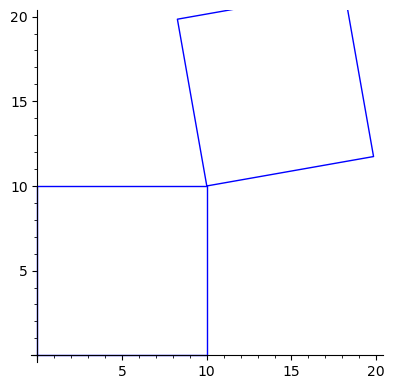

In [1]:
a = 10 # присваивание
b = 10 #свдиг по x
c = 10 #сдвиг по y

rectangle_src = matrix([
[0, 0],
[0, a],
[a, a],
[a, 0],
[0, 0]
])

x_matrix = matrix ([
[b, 0],
[b, 0],
[b, 0],
[b, 0],
[b, 0]
])

y_matrix = matrix ([
[0, c],
[0, c],
[0, c],
[0, c],
[0, c]
])

alpha = math.radians(10) # Метод преобразует значени в радианы
mat_rot = matrix([ # матрица поворота
[cos(alpha), sin(alpha)] # поворот происходит путём умножения вектора (описывающего вращаемую точку) на матрицу:
, [ -sin(alpha), cos(alpha)]
])
rectangle_rotated = (rectangle_src* mat_rot) + x_matrix + y_matrix
# rectangle_rotated = (rectangle_src* mat_rot) можно не прибавлять. Но в таком случае не будет смещения по x и по y

show(
line(rectangle_src)+ line(rectangle_rotated) # line() это функция отображающая наш график.
    #Но мы можем завернуть его в show для добавления ограничений по x y
, xmin=0, xmax=20, ymin=0, ymax=20, aspect_ratio=1)# aspect_ratio=1 делает единичные отрезки равной длины по высоте и длине

<h1>Задание 1 - часть 2 - Исследование функции</h1>
Для заданной формулой функции найти:
<ol>
    <li>Область определения функции.</li>
    <li>Является ли функция четной или нечетной, является ли периодической.</li>
    <li>Точки пересечения графика с осями координат.</li>
    <li>Промежутки знакопостоянства.</li>
    <li>Промежутки возрастания и убывания.</li>
    <li>Точки экстремума и значения в этих точках.</li>
    <li>Непрерывность. Наличие точек разрыва и их классификация.</li>
    <li>Асимптоты.</li>
</ol>
Построить график функции, асимптоты, промежутки знакопостоянства. (см. папку с материалами).<br>
Необходимо также сделать минимальное, но оформление решения, а не просто набор ответов.

<h4>Справочные материалы:</h4>
<ol>
    <li>Гусак, 1999г. - исследование графиков</li>
    <li>Ефимов, Поспелов — т.2, стр. 86</li>
    <li>Ильин, Поздняк — т.1, стр. 143 и стр. 300-327</li>
    <li>Пискунов — стр. 144-184</li>
</ol>

<h1>Варианты:</h1>

In [2]:
y = (x^3 - x^2 - x + 1)^(1/3) / tan(x)
show(y)

(x^3 - x^2 - x + 1)^(1/3)/tan(x)

In [3]:
f2 = tan(x) != 0
show("область определения")
show(solve(f2, x, algorithm='sympy'))
# solve возвращает массив решений
#find_root возвращает возвращает решение на промежутке

# Solve [eqns, vars] — предпринимает попытку решить уравнение или систему уравнений eqns относительно переменных vars;
# Solve [eqns, vars, elims] — пытается решать уравнения eqns по переменным vars, исключая переменные elims.
# В eqns в качестве знака равенства используется знак «= =».

# algorithm='sympy' алгоритм по которому будут производиться вычисления. sympy - библиотека для символьных вычисления. Символьные вычисления — это преобразования и работа с математическими равенствами и формулами как с последовательностью символов.

#Численные методы - ответ получаем точный. Например sqrt(2)=1,41...
#Аналитические методы - ответ получаем в виде корней и так далее

#Nsolve - Для численного решения систем нелинейных уравнений используется функция NSolve:
#NSolve [eqns, vars] — пытается численно решить одно уравнение или систему уравнений eqns относительно переменных vars;
#NSolve [eqns, vars, elims] — пытается численно решить уравнения eqns относительно vars, исключая переменные elims.



'область определения'

[[x > 0], [x < pi]]

[x == pi*z1786]

[0, pi, 2*pi, 3*pi, 4*pi, 5*pi, 6*pi]

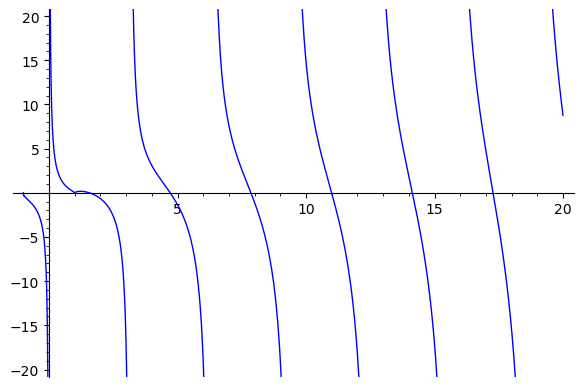

In [2]:
sols = solve(tan(x) == 0, x, to_poly_solve='force') # to_poly_solve='force' позволяет показать "скрытые решения". Как в нашем случае - это периодичность. Нам выдадут ответ pi*n
show(sols)
excl_expr = sols[0].rhs() # ближайшее значение к sols[0] (потому что в самом нем разрыв)
excl_const = excl_expr.args()[0] # args()[0] вывод аргументов
xmax=20
excl_list = [excl_expr({excl_const: i}) for i in range(0, ceil(xmax/pi))] # масиив значений исключений
# range(0, ceil(xmax/pi) пробегаемся от нуля до ceil(xmax/pi). Перебор аля 
# ceil - Этот метод возвращает наименьшее целое число, не меньше, чем х.

show(excl_list)
y(x)=(x**3 - x**2 - x + 1)**(1/3) / tan(x)
plot(y, (x, -1, xmax), ymin=-20.0, ymax=20.0, exclude=excl_list)
#(x, -1, xmax) приблежает отрисованный график
# exclude=excl_list массив точек разрыва

$$2.Является\,ли\,функция\,четной\,или\,нечетной,\,является\,ли\,периодической.$$

In [5]:
if y(x) == y(-x):
    show("функция четная")
if y(-x) == -y(x):
    show("функция нечетная")
else:
    show("функция ни четная ни нечетная")

'функция ни четная ни нечетная'

$$3.Точки\,пересечения\,графика\,с\,oсями\,координат.$$

In [6]:
show("Корней бесконечно много, поэтому укажем лишь некоторые")
solve(y(x), x)

'Корней бесконечно много, поэтому укажем лишь некоторые'

[x == -1, x == 1]

$$4. Промежутки\,знакопостоянства:$$

In [39]:
# FindRoot [Ihs == rhs, {x, x0}] — ищет численное решение уравнения Ihs == rhs, начиная с х = x0;

show("Промежутки знакопостоянства определяются найденными корнями, на промежутке (0;7):")
show("Промежутки, на которых функция принимает положительные значения:")
show("(0", ";",  round(find_root(y,1.5,2), 2), ")") # round - округление чилса, find_root(y,1.5,2) поиск корня функции y на промежутке 1,5...2
show("(3,14",  ";",  round(find_root(y, 3, 5),2), ")")


show("Промежутки, на которых функция принимает отрицательные значения:")
show("(", round(find_root(y, 1.5,2), 2), ";",  "3,14)") 
show("(", round(find_root(y, 3, 5),2),  ";",  "6.2)")


'Промежутки знакопостоянства определяются найденными корнями, на промежутке (0;7):'

'Промежутки, на которых функция принимает положительные значения:'

'(0' ';' 1.57 ')'

'(3,14' ';' 4.71 ')'

'Промежутки, на которых функция принимает отрицательные значения:'

'(' 1.57 ';' '3,14)'

'(' 4.71 ';' '6.2)'

In [43]:
sage: line?


<h3>5. Промежутки возрастания и убывания:</h3>


In [18]:
show("Промежутки возрастания и убывания определяются с помощью производной функции")
show(solve(diff(y(x), 0).simplify_full() == 0, x)) # simplify_full() возвращает упрощеную версию выражения

'Промежутки возрастания и убывания определяются с помощью производной функции'

[x == 1/2*pi, x == -1, x == 1]

'Сверху по графику мы видим что проихводная в промежутке от 1 до 1,57 положительна. В остальных случаях - отрицательна'

verbose 0 (3835: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 90 points.
verbose 0 (3835: plot.py, generate_plot_points) Last error message: 'can't convert complex to float'


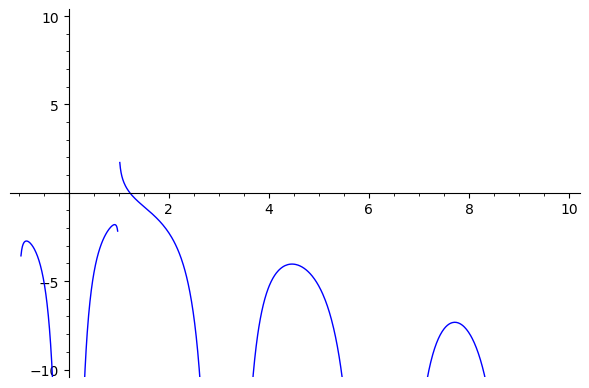

In [9]:
y_d = diff(y)
show("Сверху по графику мы видим что проихводная в промежутке от 1 до 1,57 положительна. В остальных случаях - отрицательна")
plot(y_d, xmin = -10, xmax = 10, ymin = -10, ymax = 10, exclude = [0, 1])

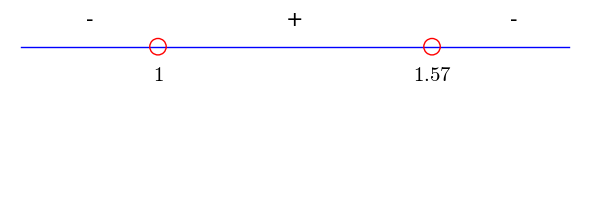

In [7]:
intervals = plot(0, xmin = 0, xmax = 2, ymin=-0.5, ymax=0.1)
intervals += circle((1.5,0), 0.03, color = 'red')
intervals += text("$" + str(numerical_approx(1.57, digits = 3)) + "$", (1.5, -0.1), color="black", fontsize=15)# digits округление до 3 знаков после запятой, (1.5, -0.1) координаты
intervals += text("+", (1, 0.1), color="black", fontsize=15)
intervals += text("$" + str(round(1)) + "$", (0.5, -0.1), color="black", fontsize=15)
intervals += circle((0.5,0), 0.03, color = 'red')
intervals += text("-", (1.8, 0.1), color="black", fontsize=15) 
intervals += text("-", (0.25, 0.1), color="black", fontsize=15) # fontsize жирность шрифта


intervals.show(axes=False)

<h3>6. Точки экстремума и значения в этих точках:</h3>

In [11]:
show("Функция меняет свой знак в точках экстремума:")
show("x= ",round(find_root(diff(y, x).simplify_full(), 1, 2), 2))
show("x= ",round(find_root(diff(y, x).simplify_full(), 0, 1.2), 2))

'Функция меняет свой знак в точках экстремума:'

'x= ' 1.22

'x= ' 1.0

из графика следует, что x = 1 точка минимума x = 1.22 точка максимума

<h3>7. Непрерывность. Наличие точек разрыва и их классификация:</h3>

В данном графике бесконечно много разрывов. Приведем для примера при x = 0

In [12]:
root = [0]
for a in root:
    lim_left = lim(y, x = a, dir = 'left') # dir предел слева
    lim_right = lim(y, x = a, dir = 'right')
    if (lim_left == lim_right and abs(lim_left) != oo and abs(lim_right) != oo):
        show("x = " + str(a) + " разрыв первого рода")
    else:
        show("x = " + str(a) + " разрыв второго рода")

'x = 0 разрыв второго рода'

<h2>Асимптоты.</h2>


[x == pi*z2862]

[0, pi, 2*pi, 3*pi, 4*pi, 5*pi, 6*pi]

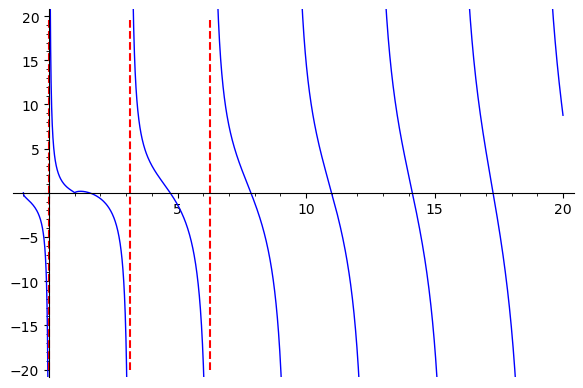

In [42]:
plot_asympt1 = line([(0,x) for x in srange(-20,20,0.1)], color='red',linestyle="--", thickness=1.5) # (0,x) первое координаты y и бесконечно много x
plot_asympt2 = line([(3.14,x) for x in srange(-20,20,0.1)], color='red',linestyle="--", thickness=1.5)
plot_asympt3 = line([(6.28,x) for x in srange(-20,20,0.1)], color='red',linestyle="--", thickness=1.5)
# дальше просто отстраивание графика
sols = solve(tan(x) == 0, x, to_poly_solve='force')
show(sols)
excl_expr = sols[0].rhs()
excl_const = excl_expr.args()[0]
xmax=20
excl_list = [excl_expr({excl_const: i}) for i in range(0, ceil(xmax/pi))]
show(excl_list)
y(x)=(x**3 - x**2 - x + 1)**(1/3) / tan(x)
show(plot(y, (x, -1, xmax), ymin=-20.0, ymax=20.0, exclude=excl_list) + plot_asympt1 + plot_asympt2 + plot_asympt3)
#